In [1]:
import mat_data_utils 
import os
import matplotlib.pyplot as plt
import numpy as np
import random

In [4]:
#Load the data for visualization
datafolder_name = ["OUTPUT","discrete_symmetric_p32_n400_rs0"]
#datafolder_name = ["OUTPUT","output 06-May-2024 21-21-34"]

data_path = os.path.join(*datafolder_name)
print(data_path)

data = mat_data_loader.load_mat_data(data_path)

OUTPUT\discrete_symmetric_p32_n400_rs0


A:\Research\Projects\NO 2D Metamaterials\mat_data_loader.py:31: UserWarning: ComplexHalf support is experimental and many operators don't support it yet. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\EmptyTensor.cpp:32.)
  EIGENVECTOR_DATA_tensor = torch.tensor(EIGENVECTOR_DATA, dtype=torch.complex32)


Data loaded in 506.65 seconds.


In [26]:
def split_array(arr, dim):
    # Get the shape of the input array
    shape = arr.shape

    # Check if the specified dimension is valid
    if dim < 0 or dim >= len(shape):
        raise ValueError(f"Invalid dimension: {dim}. Array has {len(shape)} dimensions.")

    # Check if the length of the specified dimension is even
    if shape[dim] % 2 != 0:
        raise ValueError(f"Length of dimension {dim} must be even.")

    # Create a list of slice objects for each dimension
    slices = [slice(None)] * len(shape)

    # Split the specified dimension into two halves
    half_length = shape[dim] // 2
    slices[dim] = slice(None, None, 2)
    arr1 = arr[tuple(slices)]
    slices[dim] = slice(1, None, 2)
    arr2 = arr[tuple(slices)]

    return arr1, arr2

In [66]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_eigenvectors(sample_eigenvector_x, sample_eigenvector_y, unify_scales=True):
    # Create a figure and a 2x2 subplot grid with adjusted spacing
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # Plot the real values of EIGENVECTOR_DATA_x in the top left pane
    im00 = axs[0, 0].imshow(np.real(sample_eigenvector_x), cmap='viridis')
    axs[0, 0].set_title('x displacement field real', pad=1)  # Increase the padding to avoid overlap
    axs[0, 0].axis('off')

    # Plot the imaginary values of EIGENVECTOR_DATA_x in the bottom left pane
    im10 = axs[1, 0].imshow(np.imag(sample_eigenvector_x), cmap='viridis')
    axs[1, 0].set_title('x displacement field imag', pad=1)  # Increase the padding to avoid overlap
    axs[1, 0].axis('off')

    # Plot the real values of EIGENVECTOR_DATA_y in the top right pane
    im01 = axs[0, 1].imshow(np.real(sample_eigenvector_y), cmap='viridis')
    axs[0, 1].set_title('y displacement field real', pad=1)  # Increase the padding to avoid overlap
    axs[0, 1].axis('off')

    # Plot the imaginary values of EIGENVECTOR_DATA_y in the bottom right pane
    im11 = axs[1, 1].imshow(np.imag(sample_eigenvector_y), cmap='viridis')
    axs[1, 1].set_title('y displacement field imag', pad=1)  # Increase the padding to avoid overlap
    axs[1, 1].axis('off')

    if unify_scales:
        # Find the minimum and maximum values across all subplots
        vmin = min(im.get_array().min() for im in [im00, im10, im01, im11])
        vmax = max(im.get_array().max() for im in [im00, im10, im01, im11])

        # Set the same color scale for all subplots
        for im in [im00, im10, im01, im11]:
            im.set_clim(vmin, vmax)

        # Add a single colorbar to the right of the subplots
        cbar_ax = fig.add_axes([0.98, 0.15, 0.02, 0.7])  # Adjust the position and size of the colorbar
        fig.colorbar(im00, cax=cbar_ax)
        cbar_ax.tick_params(labelsize=10)  # Adjust the font size of the colorbar labels
    else:
        # Add separate colorbars for each subplot
        for ax in axs.flatten():
            divider = make_axes_locatable(ax)
            cax = divider.append_axes('right', size='5%', pad=0.05)
            fig.colorbar(ax.images[0], cax=cax)
            cax.tick_params(labelsize=10)  # Adjust the font size of the colorbar labels

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Display the plot
    plt.show()

In [5]:
i_design = 0
i_wavevector = 1
i_band = 2
i_dim = 3
i_res = 4

#Design parameter extraction
designs = np.array(data['designs'])
design_params = np.array(data['design_params'])
n_designs = designs.shape[0]
n_panes = designs.shape[1]
design_res = designs.shape[2]

#Wavevector data extraction
WAVEVECTOR_DATA = data['WAVEVECTOR_DATA']
n_dim = WAVEVECTOR_DATA.shape[1]
WAVEVECTOR_DATA = WAVEVECTOR_DATA.transpose(0,2,1)
n_wavevectors = WAVEVECTOR_DATA.shape[1]
if np.any(np.iscomplex(WAVEVECTOR_DATA)):
    print("WAVEVECTOR_DATA array contains complex-valued elements.")

#Eigenmode data extraction
EIGENVALUE_DATA = np.array(data['EIGENVALUE_DATA']).transpose(0,2,1)
n_bands = EIGENVALUE_DATA.shape[2]
EIGENVECTOR_DATA = np.array(data['EIGENVECTOR_DATA']).transpose(0,2,1,3)
EIGENVECTOR_DATA_x, EIGENVECTOR_DATA_y = split_array(EIGENVECTOR_DATA, i_dim)
# EIGENVECTOR_DATA_x = EIGENVECTOR_DATA[...,0::2].reshape(n_designs, n_wavevectors, n_bands, design_res, design_res)
# EIGENVECTOR_DATA_y = EIGENVECTOR_DATA[...,1::2].reshape(n_designs, n_wavevectors, n_bands, design_res, design_res)
# EIGENVECTOR_DATA_real = np.real(EIGENVECTOR_DATA)
# EIGENVECTOR_DATA_imag = np.imag(EIGENVECTOR_DATA)
# EIGENVECTOR_DATA_xy = EIGENVECTOR_DATA.reshape(n_designs, n_wavevectors, n_bands, n_dim, design_res,design_res)
# EIGENVECTOR_DATA_x = EIGENVECTOR_DATA_xy[:, :, :, 0]
# EIGENVECTOR_DATA_y = EIGENVECTOR_DATA_xy[:, :, :, 0]

#Constant data extraction
const = {key: np.array(data['const'][key]) for key in data['const']}
N_struct = data['N_struct']  # Adjust indexing if necessary
imag_tol = data['imag_tol']
rng_seed_offset = data['rng_seed_offset']

#Print the shape of each variable
print(f'n_designs: {n_designs}, n_panes: {n_panes}, design_res: {design_res}, d_design: {n_dim}, dispersion_bands: {n_bands}, rng_seed_offset: {rng_seed_offset}')
print('EIGENVALUE_DATA shape:', EIGENVALUE_DATA.shape)
print('EIGENVECTOR_DATA shape:', EIGENVECTOR_DATA.shape)
print('EIGENVECTOR_DATA_x shape:', EIGENVECTOR_DATA_x.shape)
print('EIGENVECTOR_DATA_y shape:', EIGENVECTOR_DATA_y.shape)
print('WAVEVECTOR_DATA shape:', WAVEVECTOR_DATA.shape)
print('designs shape:', designs.shape)
print('design_params shape:', design_params.shape)
print('const shape:', {key: const[key].shape for key in const})

n_designs: 400, n_panes: 3, design_res: 32, d_design: 2, dispersion_bands: 6, rng_seed_offset: [[0.]]
EIGENVALUE_DATA shape: (400, 325, 6)
EIGENVECTOR_DATA shape: (400, 325, 6, 2048)
EIGENVECTOR_DATA_x shape: (400, 325, 6, 32, 32)
EIGENVECTOR_DATA_y shape: (400, 325, 6, 32, 32)
WAVEVECTOR_DATA shape: (400, 325, 2)
designs shape: (400, 3, 32, 32)
design_params shape: (1, 6)
const shape: {'E_max': (1, 1), 'E_min': (1, 1), 'N_eig': (1, 1), 'N_ele': (1, 1), 'N_pix': (1, 1), 'N_wv': (2, 1), 'a': (1, 1), 'design': (3, 32, 32), 'design_scale': (6, 1), 'isSaveEigenvectors': (1, 1), 'isUseGPU': (1, 1), 'isUseImprovement': (1, 1), 'isUseParallel': (1, 1), 'isUseSecondImprovement': (1, 1), 'poisson_max': (1, 1), 'poisson_min': (1, 1), 'rho_max': (1, 1), 'rho_min': (1, 1), 'sigma_eig': (1, 1), 'symmetry_type': (4, 1), 't': (1, 1), 'wavevectors': (2, 325)}


In [32]:
EIGENVECTOR_DATA_x, EIGENVECTOR_DATA_y = split_array(EIGENVECTOR_DATA, i_dim)
print('EIGENVECTOR_DATA_x shape:', EIGENVECTOR_DATA_x.shape)
print('EIGENVECTOR_DATA_y shape:', EIGENVECTOR_DATA_y.shape)
EIGENVECTOR_DATA_x[0,0,0]

EIGENVECTOR_DATA_x shape: (400, 325, 6, 1024)
EIGENVECTOR_DATA_y shape: (400, 325, 6, 1024)


array([ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
       -0.00438309+0.j, -0.00470352+0.j, -0.00498199+0.j], dtype=complex64)

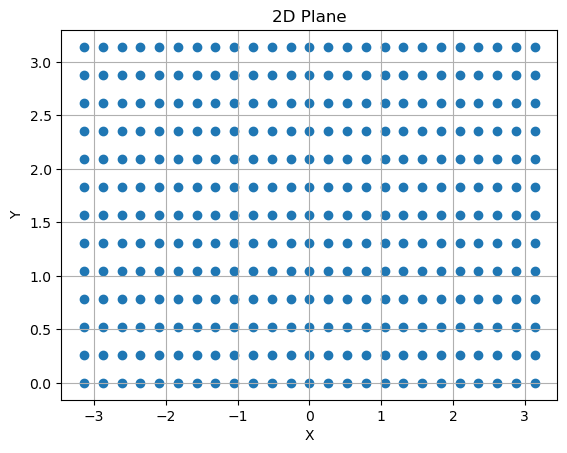

In [7]:
#View distribution of wavevectors in 2D plane
fig, ax = plt.subplots()
ax.scatter(WAVEVECTOR_DATA[0,:,0], WAVEVECTOR_DATA[0,:,1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('2D Plane')
ax.grid(True)
plt.show()

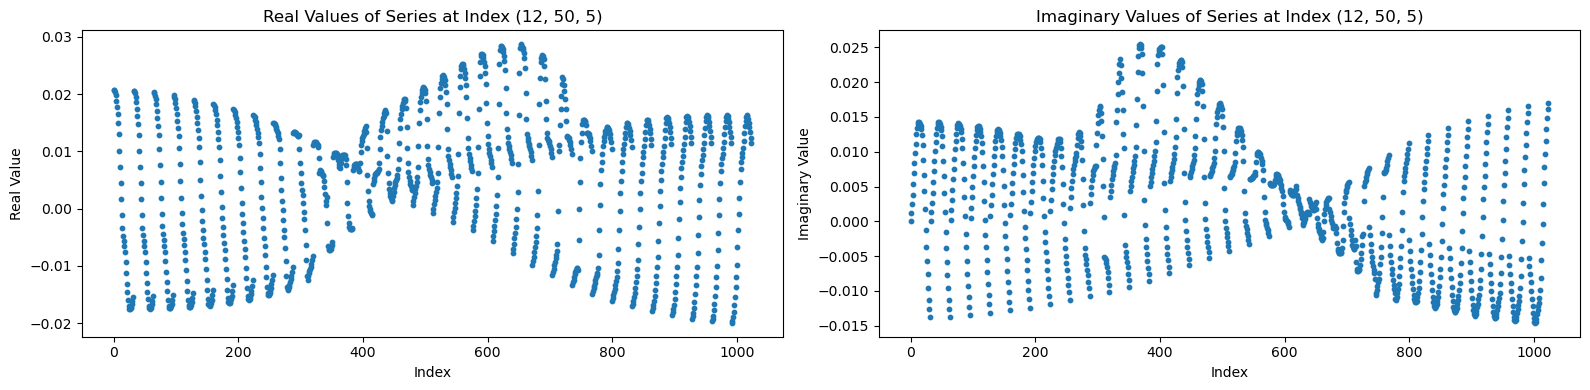

In [35]:
# Select the indices for the first three dimensions
i = 12  # Index for the first dimension
j = 50  # Index for the second dimension
k = 5  # Index for the third dimension

# Create a figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

# Plot the real values as a scatter plot
ax1.scatter(range(len(series)), np.real(series), s=10)
ax1.set_xlabel('Index')
ax1.set_ylabel('Real Value')
ax1.set_title(f'Real Values of Series at Index ({i}, {j}, {k})')

# Plot the imaginary values as a scatter plot
ax2.scatter(range(len(series)), np.imag(series), s=10)
ax2.set_xlabel('Index')
ax2.set_ylabel('Imaginary Value')
ax2.set_title(f'Imaginary Values of Series at Index ({i}, {j}, {k})')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [51]:
EIGENVECTOR_DATA_x = EIGENVECTOR_DATA_x.reshape(n_designs, n_wavevectors, n_bands, design_res, design_res, order='C') 
EIGENVECTOR_DATA_y = EIGENVECTOR_DATA_y.reshape(n_designs, n_wavevectors, n_bands, design_res, design_res, order='C')

In [71]:
#Draw a random design and its corresponding eigenvectors
#random_seed = 10
#random.seed(random_seed)
sample_index = random.randint(0,n_designs-1)
sample_geometry = designs[sample_index,0]
sample_band = random.randint(0,n_bands-1)
sample_wavevector = random.randint(0,n_wavevectors-1)
print(f'Design: {sample_index}, Band: {sample_band}, Wavevector: {sample_wavevector}')

Design: 142, Band: 5, Wavevector: 82


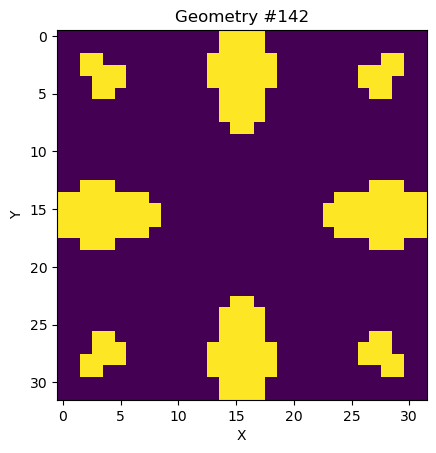

Wavevector index: 82, components: [-1.57   1.047]


In [72]:
#View a geometry design alongside x and y displacement fields (eigenvectors) 
fig, ax = plt.subplots()
im = ax.imshow(sample_geometry)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title(f'Geometry #{sample_index}')
plt.show()
print(f'Wavevector index: {sample_wavevector}, components: {WAVEVECTOR_DATA[sample_index,sample_wavevector]}')
#sample_geometry

Design: 142, Band: 5, Wavevector: 82


C:\Users\zhang\AppData\Local\Temp\ipykernel_65208\3584649831.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


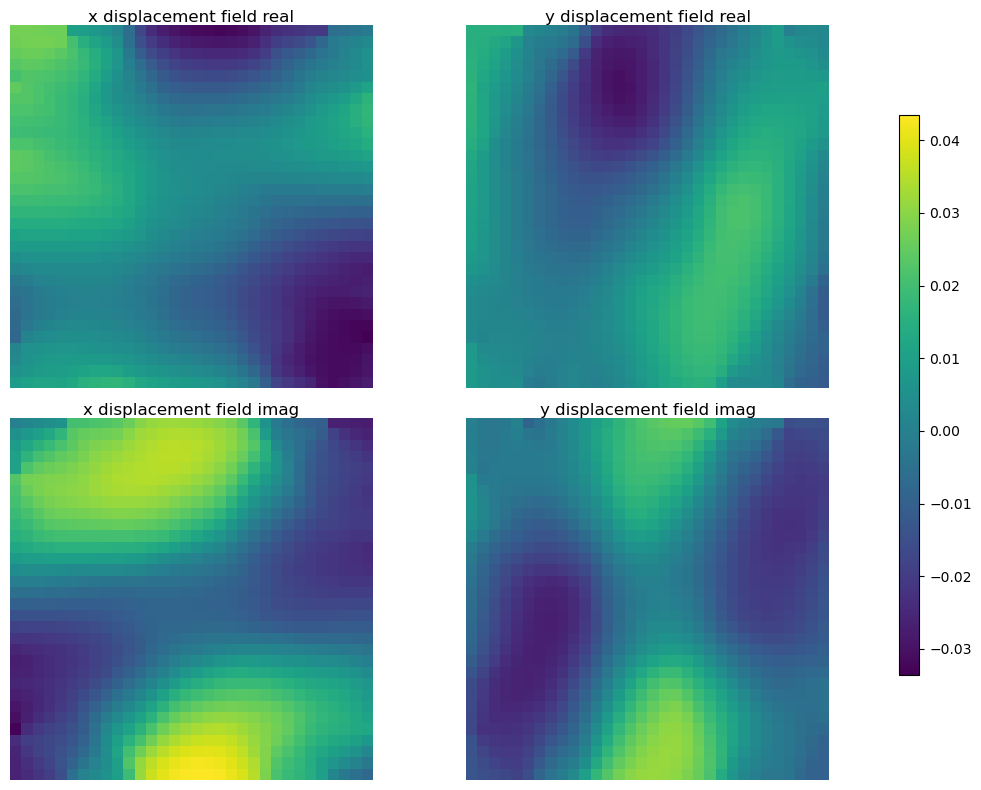

In [73]:
print(f'Design: {sample_index}, Band: {sample_band}, Wavevector: {sample_wavevector}')
sample_eigenvector_x = EIGENVECTOR_DATA_x[sample_index,sample_wavevector,sample_band]
sample_eigenvector_y = EIGENVECTOR_DATA_y[sample_index,sample_wavevector,sample_band]

plot_eigenvectors(sample_eigenvector_x, sample_eigenvector_y, unify_scales=True)